In [1]:
import pandas as pd
import re
import numpy as np
import math
from pprint import pprint

In [2]:
# read oscar winning movie list
oscar_df_1 = pd.DataFrame( pd.read_csv("Resources/oscar_omdb_1.csv" ) )
oscar_df_2 = pd.DataFrame( pd.read_csv("Resources/oscar_omdb_2.csv" ) )

oscar_df_1 = oscar_df_1[ oscar_df_1['Year'] > 0 ] # no need when 2 file is seperated properly

print(oscar_df_1.shape)
print(oscar_df_2.shape)

oscar_df = pd.concat([oscar_df_1, oscar_df_2])
oscar_df = oscar_df.reset_index( drop=True )
oscar_df = oscar_df.drop_duplicates()

print(oscar_df.shape)

(938, 21)
(398, 21)
(1336, 21)


In [3]:
oscar_df.head()

,Oscar_Film,Oscar_Year,Oscar_Award,Oscar_Nomination,Year,Rated,Runtime,Genre,Director,Writer,...,Plot,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Ratings_IMD,Ratings_Rotten_Tomatoes,Ratings_Metacritic
0,Everything Everywhere All at Once,2022,7,11,2022.0,R,139 min,"Action, Adventure, Comedy","Daniel Kwan, Daniel Scheinert","Daniel Kwan, Daniel Scheinert",...,A middle-aged Chinese immigrant is swept up in...,"English, Mandarin, Cantonese",United States,Won 7 Oscars. 372 wins & 357 nominations total,7.8,"445,131","$77,191,785",7.8/10,93%,81/100
1,All Quiet on the Western Front,2022,4,9,2022.0,R,148 min,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell",...,A young German soldier's terrifying experience...,"German, French","Germany, United States, United Kingdom",Won 4 Oscars. 48 wins & 81 nominations total,7.8,"205,354",NaN,7.8/10,90%,76/100
2,The Whale,2022,2,3,2022.0,R,117 min,Drama,Darren Aronofsky,Samuel D. Hunter,...,"A reclusive, morbidly obese English teacher at...",English,United States,Won 2 Oscars. 43 wins & 116 nominations total,7.7,"139,972","$17,463,630",7.7/10,64%,60/100
3,Top Gun: Maverick,2022,1,6,2022.0,PG-13,130 min,"Action, Drama",Joseph Kosinski,"Jim Cash, Jack Epps Jr., Peter Craig",...,"After thirty years, Maverick is still pushing ...",English,United States,Won 1 Oscar. 93 wins & 214 nominations total,8.3,"590,794","$718,732,821",8.3/10,96%,78/100
4,Black Panther: Wakanda Forever,2022,1,5,2022.0,PG-13,161 min,"Action, Adventure, Drama",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee",...,The people of Wakanda fight to protect their h...,"English, Xhosa, Maya, Spanish, Haitian, French",United States,Won 1 Oscar. 44 wins & 154 nominations total,6.7,"270,203","$453,829,060",6.7/10,84%,67/100


In [4]:
# change Year to int
oscar_df['Year'] = pd.to_numeric(oscar_df['Year'], errors='coerce')

# remove none 0-9 from str, change col type to numeric
oscar_df['imdbVotes'] = [ re.sub( "[^0-9]","" , str(vote) ) for vote in oscar_df[ 'imdbVotes' ] ]
oscar_df['imdbVotes'] = pd.to_numeric(oscar_df['imdbVotes'], errors='coerce')

oscar_df['Runtime'] = [ re.sub( "[^0-9]","" , str(time) ) for time in oscar_df[ 'Runtime' ] ]
oscar_df['Runtime'] = pd.to_numeric(oscar_df['Runtime'], errors='coerce')

oscar_df['BoxOffice'] = [ re.sub( "[^0-9]","" , str(dollar) ) for dollar in oscar_df[ 'BoxOffice' ] ]
oscar_df['BoxOffice'] = pd.to_numeric(oscar_df['BoxOffice'], errors='coerce')

# change Ratings_IMD str 7.8/10 to int 7.8
oscar_df['Ratings_IMD'] = [ re.sub( "\/10","" , str(rate) ) for rate in oscar_df[ 'Ratings_IMD' ] ]
oscar_df['Ratings_IMD'] = pd.to_numeric(oscar_df['Ratings_IMD'], errors='coerce')

# change Ratings_Rotten_Tomatoes str 78% to int 7.8
oscar_df['Ratings_Rotten_Tomatoes'] = [ re.sub( "\%","" , str(rate) ) for rate in oscar_df[ 'Ratings_Rotten_Tomatoes' ] ]
oscar_df['Ratings_Rotten_Tomatoes'] = pd.to_numeric(oscar_df['Ratings_Rotten_Tomatoes'], errors='coerce')
oscar_df['Ratings_Rotten_Tomatoes'] = oscar_df['Ratings_Rotten_Tomatoes']/10


# change Ratings_Metacritic str 78/100 to int 7.8
oscar_df['Ratings_Metacritic'] = [ re.sub( "\/100","" , str(rate) ) for rate in oscar_df[ 'Ratings_Metacritic' ] ]
oscar_df['Ratings_Metacritic'] = pd.to_numeric(oscar_df['Ratings_Metacritic'], errors='coerce')
oscar_df['Ratings_Metacritic'] = oscar_df['Ratings_Metacritic']/10

In [5]:
oscar_df.dtypes

Oscar_Film                  object
Oscar_Year                   int64
Oscar_Award                  int64
Oscar_Nomination             int64
Year                       float64
Rated                       object
Runtime                    float64
Genre                       object
Director                    object
Writer                      object
Actors                      object
Plot                        object
Language                    object
Country                     object
Awards                      object
imdbRating                 float64
imdbVotes                  float64
BoxOffice                  float64
Ratings_IMD                float64
Ratings_Rotten_Tomatoes    float64
Ratings_Metacritic         float64
dtype: object

In [6]:
oscar_df.columns

Index(['Oscar_Film', 'Oscar_Year', 'Oscar_Award', 'Oscar_Nomination', 'Year',
       'Rated', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'Language', 'Country', 'Awards', 'imdbRating', 'imdbVotes', 'BoxOffice',
       'Ratings_IMD', 'Ratings_Rotten_Tomatoes', 'Ratings_Metacritic'],
      dtype='object')

In [7]:
# check how may Language there are

language_list = []
for language in oscar_df['Language'].dropna() :
    language_list.extend( re.split( ',', language))

language_list = [ re.sub(r'^\s+|\s+$', '', language) for language in language_list ]

pd.DataFrame(language_list).value_counts()

English        1222
French          232
German          129
Spanish         124
Italian          99
               ... 
Korean Sign       1
Klingon           1
Kikuyu            1
Kannada           1
Malayalam         1
Length: 112, dtype: int64

In [8]:
# check how may Country there are

country_list = []
for country in oscar_df['Country'].dropna() :
    country_list.extend( re.split( ',', country))

country_list = [ re.sub(r'^\s+|\s+$', '', country) for country in country_list ]

pd.DataFrame(country_list).value_counts()

United States             1095
United Kingdom             237
France                      99
Germany                     54
Canada                      48
Japan                       45
Italy                       40
Australia                   27
Spain                       16
China                       13
Mexico                      12
Denmark                     12
Ireland                     10
Switzerland                  9
Sweden                       9
Belgium                      9
New Zealand                  9
Netherlands                  8
India                        8
West Germany                 8
Austria                      7
Hungary                      6
Brazil                       5
Hong Kong                    4
Taiwan                       4
Argentina                    4
Norway                       4
Czech Republic               4
South Africa                 4
Turkey                       3
Czechoslovakia               3
Chile                        3
USA     

In [9]:
# check how may Genre there are

genre_list = []
for genre in oscar_df['Genre'].dropna() :
    genre_list.extend( re.split( ',', genre))

genre_list = [ re.sub(r'^\s+|\s+$', '', genre) for genre in genre_list ]

pd.DataFrame(genre_list).value_counts()

Drama          814
Comedy         346
Romance        282
Short          236
Biography      202
Adventure      189
Documentary    166
Action         122
Animation      121
Crime          111
History        100
Music           93
Family          90
War             86
Thriller        74
Musical         70
Fantasy         64
Mystery         55
Sci-Fi          47
Western         29
Sport           27
Horror          21
Film-Noir       14
News             3
dtype: int64

In [10]:
oscar_df.head()

,Oscar_Film,Oscar_Year,Oscar_Award,Oscar_Nomination,Year,Rated,Runtime,Genre,Director,Writer,...,Plot,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Ratings_IMD,Ratings_Rotten_Tomatoes,Ratings_Metacritic
0,Everything Everywhere All at Once,2022,7,11,2022.0,R,139.0,"Action, Adventure, Comedy","Daniel Kwan, Daniel Scheinert","Daniel Kwan, Daniel Scheinert",...,A middle-aged Chinese immigrant is swept up in...,"English, Mandarin, Cantonese",United States,Won 7 Oscars. 372 wins & 357 nominations total,7.8,445131.0,77191785.0,7.8,9.3,8.1
1,All Quiet on the Western Front,2022,4,9,2022.0,R,148.0,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell",...,A young German soldier's terrifying experience...,"German, French","Germany, United States, United Kingdom",Won 4 Oscars. 48 wins & 81 nominations total,7.8,205354.0,NaN,7.8,9.0,7.6
2,The Whale,2022,2,3,2022.0,R,117.0,Drama,Darren Aronofsky,Samuel D. Hunter,...,"A reclusive, morbidly obese English teacher at...",English,United States,Won 2 Oscars. 43 wins & 116 nominations total,7.7,139972.0,17463630.0,7.7,6.4,6.0
3,Top Gun: Maverick,2022,1,6,2022.0,PG-13,130.0,"Action, Drama",Joseph Kosinski,"Jim Cash, Jack Epps Jr., Peter Craig",...,"After thirty years, Maverick is still pushing ...",English,United States,Won 1 Oscar. 93 wins & 214 nominations total,8.3,590794.0,718732821.0,8.3,9.6,7.8
4,Black Panther: Wakanda Forever,2022,1,5,2022.0,PG-13,161.0,"Action, Adventure, Drama",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee",...,The people of Wakanda fight to protect their h...,"English, Xhosa, Maya, Spanish, Haitian, French",United States,Won 1 Oscar. 44 wins & 154 nominations total,6.7,270203.0,453829060.0,6.7,8.4,6.7


In [11]:
oscar_year = oscar_df.drop(columns=['Oscar_Year', 'imdbRating'])
oscar_year.sort_values(by=['Year'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(oscar_year)
# display(oscar_year)
oscar_year.rename(columns={"Oscar_Film": "Oscar Film", "Oscar_Award": "Oscars Won", "Oscar_Nomination": "Nominations", "BoxOffice": "Box Office",
                          "Ratings_IMD": "IMDB", "Ratings_Rotten_Tomatoes": "Rotten Tomatoes", "Ratings_Metacritic": "Metacritic"}, inplace=True)

(0.0, 500.0)

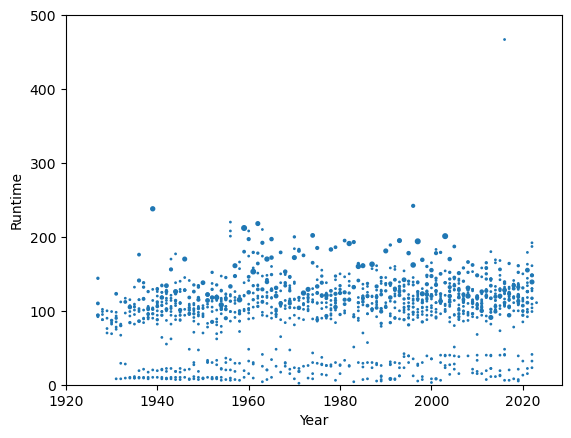

In [15]:

oscarplot = oscar_year.plot.scatter(x='Year', y='Runtime', s=oscar_year['Oscars Won'] )
oscarplot.set_xlim(1920, )
oscarplot.set_ylim(0, 500)

In [16]:
print(oscar_year.columns)

Index(['Oscar Film', 'Oscars Won', 'Nominations', 'Year', 'Rated', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'imdbVotes', 'Box Office', 'IMDB', 'Rotten Tomatoes',
       'Metacritic'],
      dtype='object')


In [17]:
runtime_clean = oscar_year.dropna(subset=['Runtime'])
max_runtime = oscar_year.loc[oscar_year['Runtime'].idxmax()]
print(max_runtime)

Oscar Film                                     O.J.: Made in America
Oscars Won                                                         1
Nominations                                                        1
Year                                                          2016.0
Rated                                                          TV-MA
Runtime                                                        467.0
Genre                                  Documentary, Biography, Crime
Director                                                Ezra Edelman
Writer                                                           NaN
Actors              Kareem Abdul-Jabbar, Mike Albanese, Muhammad Ali
Plot               A chronicle of the rise and fall of O.J. Simps...
Language                                                     English
Country                                                United States
Awards                   Won 1 Oscar. 49 wins & 35 nominations total
imdbVotes                         

In [56]:
# row_index = runtime_clean.index[runtime_clean['Oscar Film'] == 'O.J.: Made in America'][0]
# row_index
# runtime_clean.drop(96, inplace=True)

C:\Users\eriks\AppData\Local\Temp\ipykernel_18188\4035293096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_clean.drop(96, inplace=True)


In [18]:
filepath = 'Resources/runtime_clean.csv'
runtime_clean.to_csv(filepath, index=False)
